In [1]:
csvfile = "dataV2_cohortV3.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(csvfile)

In [4]:
# Mapping the variables to numeric values
mapping_dict = {
    'WELLNESS_malach_pines_burnout_measure_depressed': {
        'Never': 0,
        'Almost never': 1,
        'Rarely': 2,
        'Sometimes': 3,
        'Very Often': 4,
        'Always': 5
    }
}

In [5]:
# Map values and rename

# Create columns for OnlineGames and SocialFriends with 'C' (text) and numeric values
df['OnlineGamesC'] = df['CONNECTION_activities_onlinegames_p3m']

df['SocialFriendsC'] = df['CONNECTION_social_time_friends_p7d_grouped']

# Create 'Depression' column with numeric values only
df['DepressionC'] = df['WELLNESS_malach_pines_burnout_measure_depressed']
df['DepressionN'] = df['WELLNESS_malach_pines_burnout_measure_depressed'].map(mapping_dict['WELLNESS_malach_pines_burnout_measure_depressed'])



# Drop the original columns from df
keep_cols = ['OnlineGamesC', 'SocialFriendsC', 'DepressionC', 'DepressionN']
df = df[keep_cols]

In [6]:
# Drop NA
df = df.dropna()

In [7]:
# Reorder the categories for OnlineGamesC to make "Not in the past three months" the reference category
df['OnlineGamesC'] = pd.Categorical(df['OnlineGamesC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                           ordered=True)

# Reorder the categories for SocialFriendsC to make "No time" the reference category
df['SocialFriendsC'] = pd.Categorical(df['SocialFriendsC'],
                                            categories=['No time', 'Less than 1 hour', '1 to 4 hours', '5 or more hours'],
                                            ordered=True)


In [8]:
df["OnlineGamesB"] = df["OnlineGamesC"] != "Not in the past three months"
df['SocialFriendsB'] = df['SocialFriendsC'] != 'No time'

In [9]:
df

,OnlineGamesC,SocialFriendsC,DepressionC,DepressionN,OnlineGamesB,SocialFriendsB
0,Not in the past three months,5 or more hours,Rarely,2.0,False,True
1,Not in the past three months,5 or more hours,Almost never,1.0,False,True
2,Not in the past three months,5 or more hours,Almost never,1.0,False,True
3,Weekly,1 to 4 hours,Rarely,2.0,True,True
4,Weekly,5 or more hours,Almost never,1.0,True,True
...,...,...,...,...,...,...
844,Not in the past three months,1 to 4 hours,Always,5.0,False,True
845,Not in the past three months,1 to 4 hours,Very Often,4.0,False,True
846,Not in the past three months,Less than 1 hour,Always,5.0,False,True
847,Not in the past three months,5 or more hours,Sometimes,3.0,False,True


In [10]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(549, 138)

In [11]:
# Fit the OLS model using categorical values (OnlineGamesC and SocialFriendsC)
ols_model_c = smf.ols("DepressionN ~ C(OnlineGamesC) + C(SocialFriendsC)", data=train_df)

fitted_ols_model_c = ols_model_c.fit()
# Display the regression results
fitted_ols_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.512
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           0.000306
Time:                        19:33:09   Log-Likelihood:                -930.33
No. Observations:                 549   AIC:                             1881.
Df Residuals:                     539   BIC:                             1924.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    2.7953      0.132     21.186      0.000       2.536       3.054
C(OnlineGamesC)[T.Less than monthly]         0.2363      0.248      0.952      0.342      -0.251       0.724
C(OnlineGamesC)[T.Monthly]                   0.5445      0.549      0.993      0.321      -0.533       1.622
C(OnlineGamesC)[T.A few times a month]       0.4024      0.260      1.547      0.122      -0.108       0.913
C(OnlineGamesC)[T.Weekly]                    0.7011      0.321      2.185      0.029       0.071       1.331
C(OnlineGamesC)[T.A few times a week]        0.0375      0.321      0.117      0.907      -0.593       0.668
C(OnlineGamesC)[T.Daily or almost daily]     0.0654      0.225      0.291      0.771      -0.376       0.507
C(SocialFriendsC)[T.Less than 1 hour]       -0.5439      0.181     -3.002      0.003      -0.900      -0.188
C(SocialFriendsC)[T.1 to 4 hours]           -0.6102      0.164     -3.718      0.000      -0.933      -0.288
C(SocialFriendsC)[T.5 or more hours]        -0.7965      0.165     -4.824      0.000      -1.121      -0.472
==============================================================================
Omnibus:                       19.069   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.069
Skew:                          -0.000   Prob(JB):                       0.0107
Kurtosis:                       2.370   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Fit the OLS model using categorical values (OnlineGamesB and SocialFriendsC)
# Binary values for online games
ols_model_b = smf.ols("DepressionN ~ C(OnlineGamesB) + C(SocialFriendsC)", data=train_df)

fitted_ols_model_b = ols_model_b.fit()

# Display the regression results
fitted_ols_model_b.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     6.947
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.85e-05
Time:                        19:33:09   Log-Likelihood:                -932.29
No. Observations:                 549   AIC:                             1875.
Df Residuals:                     544   BIC:                             1896.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.7735      0.131     21.242      0.000       2.517       3.030
C(OnlineGamesB)[T.True]                   0.2700      0.130      2.075      0.038       0.014       0.526
C(SocialFriendsC)[T.Less than 1 hour]    -0.5219      0.179     -2.914      0.004      -0.874      -0.170
C(SocialFriendsC)[T.1 to 4 hours]        -0.5829      0.162     -3.600      0.000      -0.901      -0.265
C(SocialFriendsC)[T.5 or more hours]     -0.7660      0.164     -4.680      0.000      -1.087      -0.444
==============================================================================
Omnibus:                       21.316   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.782
Skew:                          -0.028   Prob(JB):                      0.00751
Kurtosis:                       2.349   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
clf = DecisionTreeClassifier(max_depth=10, random_state=10)

y_train = train_df['DepressionC']
X_train = pd.get_dummies(train_df[['OnlineGamesC', 'SocialFriendsC', 'OnlineGamesB', 'SocialFriendsB']])

y_test = test_df['DepressionC']
X_test = pd.get_dummies(test_df[['OnlineGamesC', 'SocialFriendsC', 'OnlineGamesB', 'SocialFriendsB']])

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [15]:
fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(clf, ax=ax, fontsize=22, feature_names=X_train.columns, class_names=clf.classes_)
plt.show()

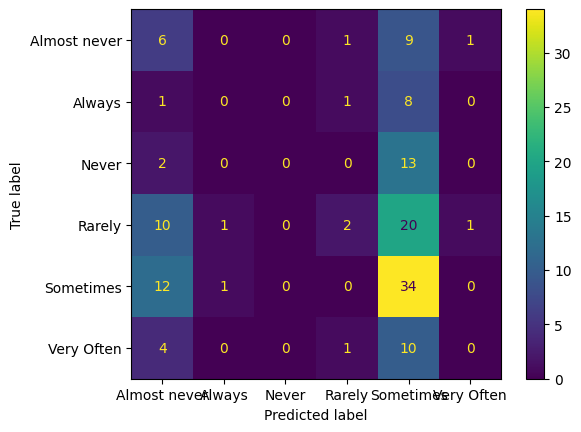

In [16]:
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm = cm_display.confusion_matrix

In [17]:
y_pred = clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# sensitivity = recall_score(y_test, y_pred, average='macro')
# specificity = recall_score(y_test, y_pred, pos_label='Almost never', average='macro')
# precision = precision_score(y_test, y_pred, average='macro')

In [18]:
# print(f"accuracy: {accuracy}")
# print(f"sensitivity: {sensitivity}")
# print(f"specificity: {specificity}")
# print(f"precision: {precision}")